# Iris_classification

In [102]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [103]:
data = pd.read_csv('Iris.csv')

In [104]:
df = data.copy()

In [105]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
cols = df.columns
df.columns = [col.lower() for col in cols]

In [107]:
df.head(5)

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

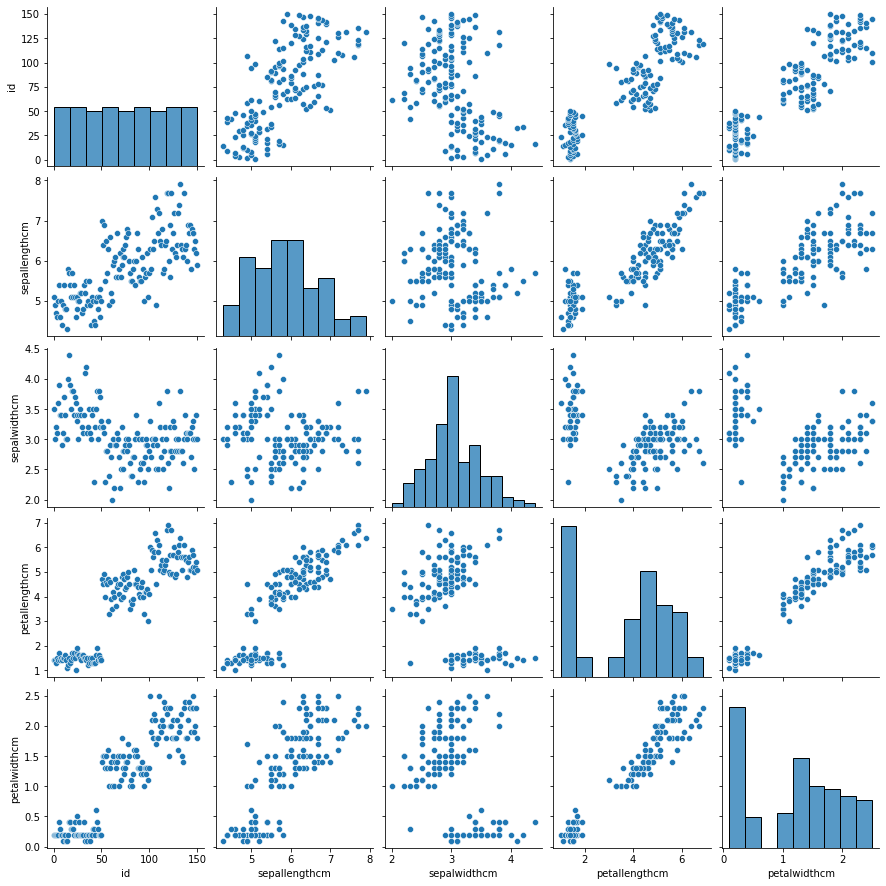

In [116]:
sns.pairplot(df)

In [117]:
X = df.iloc[:,[1,2]].values
Y = df.iloc[:,[3,4]].values

In [118]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [119]:
sc = StandardScaler()
X = sc.fit_transform(X)
Y = sc.fit_transform(Y)

In [120]:
pca = PCA(n_components = 1)
X = pca.fit_transform(X)
Y = pca.fit_transform(Y)
explained_variance = pca.explained_variance_ratio_

In [128]:
X

array([[-1.36665243],
       [-0.71987664],
       [-1.2184871 ],
       [-1.14053912],
       [-1.61595765],
       [-1.76412298],
       [-1.63141893],
       [-1.28870444],
       [-0.98464315],
       [-0.88350325],
       [-1.43686977],
       [-1.46006169],
       [-0.80555526],
       [-1.23394838],
       [-1.58503509],
       [-2.32522014],
       [-1.76412298],
       [-1.36665243],
       [-1.34346051],
       [-1.85753224],
       [-0.94598995],
       [-1.69390564],
       [-1.95867215],
       [-1.03939921],
       [-1.46006169],
       [-0.63419802],
       [-1.28870444],
       [-1.2809738 ],
       [-1.1173472 ],
       [-1.2184871 ],
       [-0.96918187],
       [-0.94598995],
       [-2.26273344],
       [-2.16932417],
       [-0.88350325],
       [-0.96145123],
       [-1.02393793],
       [-0.88350325],
       [-1.14826976],
       [-1.20302582],
       [-1.45233105],
       [ 0.08279511],
       [-1.47552297],
       [-1.45233105],
       [-1.85753224],
       [-0

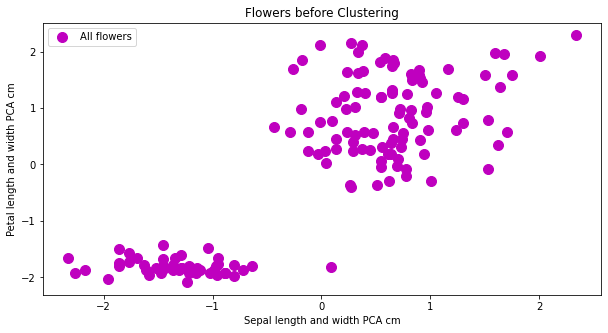

In [121]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X,Y,s=100,c='m',label='All flowers')
plt.title('Flowers before Clustering')
plt.xlabel('Sepal length and width PCA cm')
plt.ylabel('Petal length and width PCA cm')
plt.legend()
plt.show()

Elbow Method

C:\Users\Tural\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


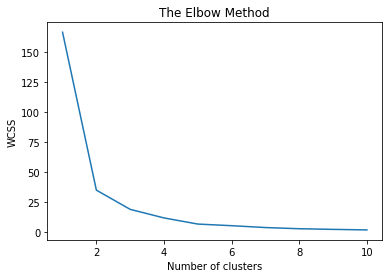

In [122]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouete method

In [123]:
range_n_clusters = [2, 3, 4]
for i in range_n_clusters:
    clusterer = KMeans(n_clusters=i, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7140504959181186
For n_clusters = 3 The average silhouette_score is : 0.5938811871970823
For n_clusters = 4 The average silhouette_score is : 0.6286648104500165


# K means

In [124]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [125]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [126]:
kmeans.cluster_centers_

array([[ 1.31727439],
       [-1.34150247],
       [ 0.40766503]])

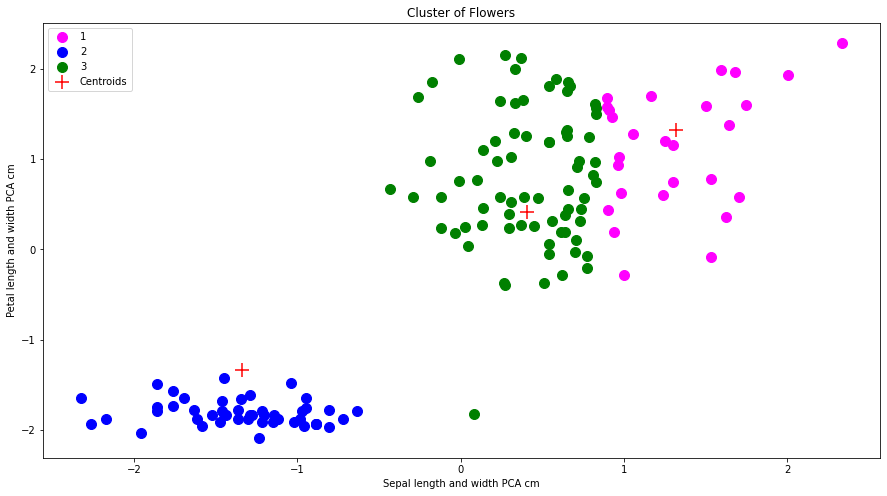

In [132]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0],Y[y_kmeans==0],s=100,c='magenta',label='1')
plt.scatter(X[y_kmeans==1],Y[y_kmeans==1],s=100,c='blue',label='2')
plt.scatter(X[y_kmeans==2],Y[y_kmeans==2],s=100,c='green',label='3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Flowers')
plt.xlabel('Sepal length and width PCA cm')
plt.ylabel('Petal length and width PCA cm')
plt.legend()
plt.show()

# Hierarchial

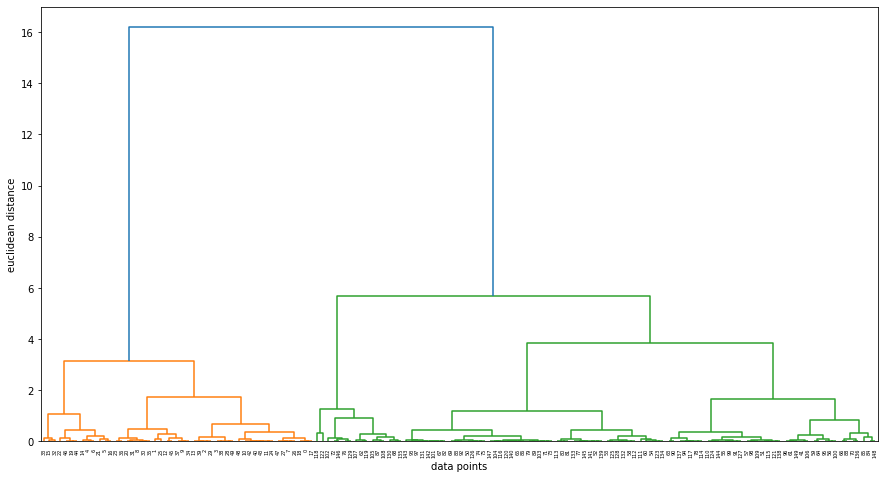

In [140]:
# %% dendogram
fig = plt.figure(figsize = (15,8))
merg = linkage(X,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

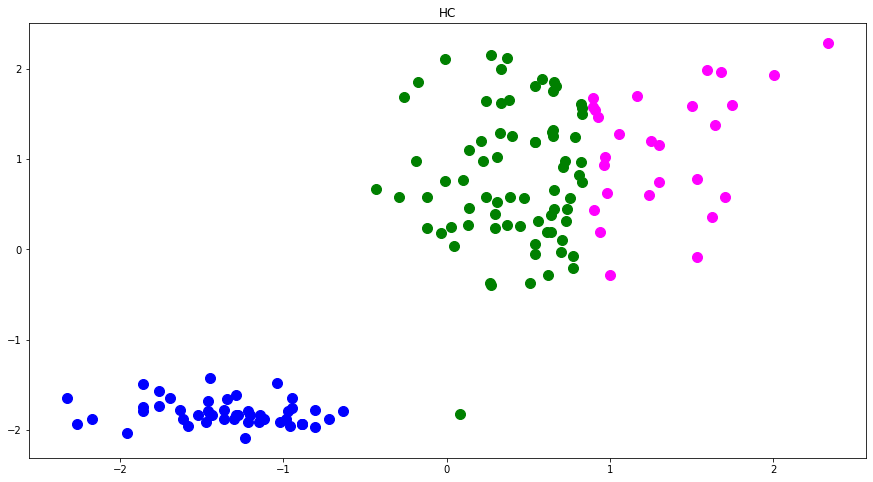

In [137]:
#HC
fig = plt.figure(figsize = (15,8))
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(X)

plt.scatter(X[y_kmeans==0],Y[y_kmeans==0],s=100,c='magenta',label='1')
plt.scatter(X[y_kmeans==1],Y[y_kmeans==1],s=100,c='blue',label='2')
plt.scatter(X[y_kmeans==2],Y[y_kmeans==2],s=100,c='green',label='3')
plt.title('HC')
plt.show()